In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from minisom import MiniSom 
import pickle
from sklearn.cluster import KMeans

d1 = 20
d2 = 25
data = np.genfromtxt('10clusters.vec', skip_header=4, usecols=list(range(10)))
som = None
with open('small_10clusters.p', 'rb') as infile:
    som = pickle.load(infile)

In [5]:
def winners_labels(som,rweights,labels, d1, d2):
    winners_labels = np.zeros(shape=(d1,d2))
    for cnt, xx in enumerate (rweights):
        w = som.winner(xx)
        l = labels[cnt]
        winners_labels[w[0],w[1]] = l
    return winners_labels

In [8]:

def plot_with_labelling(som, d1, d2, labels, coloring_labels, rweights, debug=False):

    plt.figure(figsize=(d1//2, d2//2))
    # Plotting the response for each pattern in the iris dataset
    #win_map = som.win_map(rweights)
    #plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
    #plt.colorbar()
    # use different colors and markers for each label
    #markers = ['o', 's', 'D']
    colors = ['C' + str(i) for i in np.unique(coloring_labels)]
    win_labels = winners_labels(som,rweights,labels,d1,d2)

    for cnt, xx in enumerate(rweights):
        w = som.winner(xx)  # getting the winner
        #w = xx
        # palce a marker on the winning position for the sample xx
        plt.plot(w[0]+.5, w[1]+.5, 's', markerfacecolor=colors[coloring_labels[cnt]],
                markeredgecolor=colors[coloring_labels[cnt]], markersize=20, markeredgewidth=2)
    def plot_borders(debug=False):
        border_color = lambda c : c if debug else 'black'
        for i,row in enumerate(win_labels):
            for j,v in enumerate(row):
                if j < win_labels.shape[1]-1 and v != row[j+1]:
                    plt.plot([i,i+1],[j+1,j+1], color=border_color('red'))
                if i < win_labels.shape[0]-1 and v != win_labels[i+1][j]:
                    plt.plot([i+1,i+1],[j,j+1], color=border_color('blue'))    
    plot_borders(debug)
    plt.axis([0, d1, 0, d2])
    plt.show()


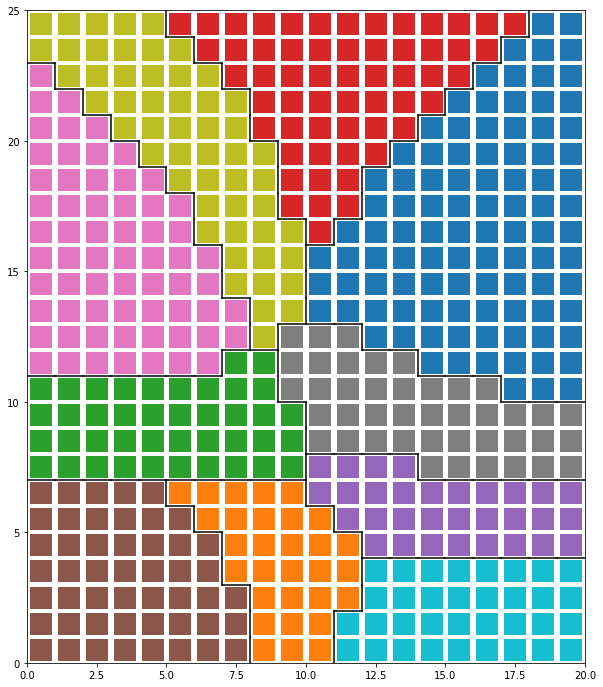

In [20]:
n_clusters = 10
rweights = som.get_weights().reshape(d1*d2,-1) # first argument is product of first two dimensions of the input dataset
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(rweights)
labels = kmeans.labels_
plot_with_labelling(som,d1,d2,labels,labels,rweights,debug=False)

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(data)
label = kmeans.labels_    
labels_map = som.labels_map(data, label)
label_names = np.unique(label)
plt.figure(figsize=(d1, d2))
the_grid = GridSpec(d1, d2)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[position[0], position[1]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.show()

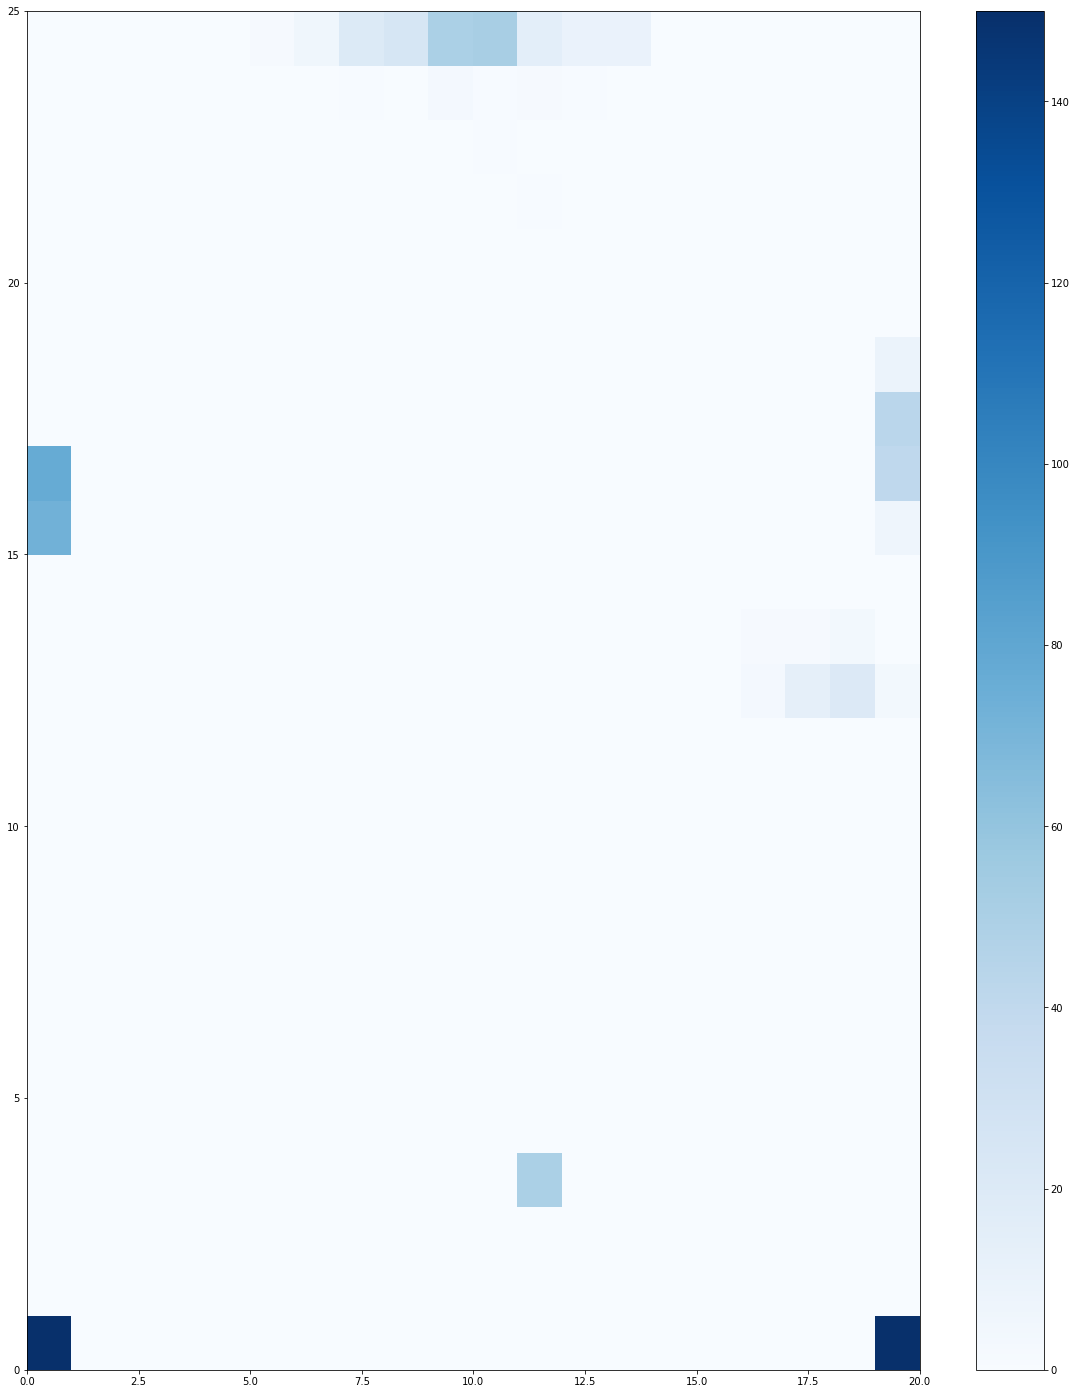

In [34]:
plt.figure(figsize=(d1, d2))
frequencies = som.activation_response(data)
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()
plt.show()

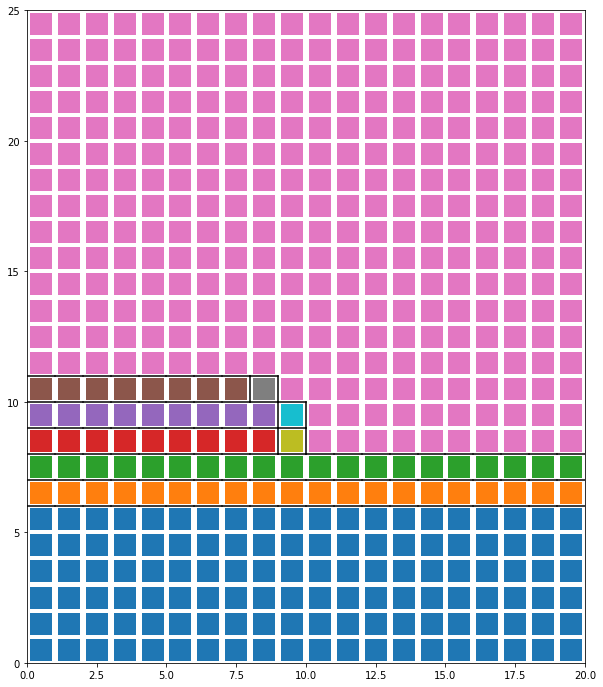

In [40]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster,cut_tree

rweights = som.get_weights().reshape(d1*d2,-1)
Z = linkage(rweights, 'single', optimal_ordering=True)

cuttree= cut_tree(Z,n_clusters=10)
coloring_labels = [i[0] for i in cuttree]
labels = coloring_labels
plot_with_labelling(som,d1,d2,labels,coloring_labels,rweights,debug=False)



In [38]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 52,  32,  37,  74,  60,  28,  28, 123,  32,  34], dtype=int64))